In [1]:
from pathlib import Path
import os
%autoreload 2
import src.utils as utils
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
os.getcwd()


'/Users/bpedigo/JHU_code/maggot_models/maggot_models/notebooks'

In [4]:
experiment = "drosophila-1-rdpg-sbm"
run = 3
exp_path = Path(f"../models/runs/{experiment}/{run}")
run_path = exp_path / "run.json"
dfs = utils.run_to_df(run_path)
sbm_df = dfs[0]
rdpg_df = dfs[1]

In [5]:
rdpg_df.head()

,directed,mse,n_components_try,n_params,rss,score
0,True,0.070606,1.0,418.0,3069.390125,-4775.165417
1,True,0.061434,2.0,836.0,2670.641738,NaN
10,True,0.040631,11.0,4598.0,1766.329478,NaN
11,True,0.039386,12.0,5016.0,1712.209040,NaN
2,True,0.053011,3.0,1254.0,2304.472540,NaN


In [6]:
sbm_df.head()

,mse,n_block_try,n_components_try,n_params_gmm,n_params_sbm,rss,score
0,0.166239,1.0,1.0,5.0,1.0,3613.379594,-11221.955282
1,0.129570,2.0,1.0,11.0,3.0,2816.328536,-9348.767178
10,0.166239,1.0,2.0,14.0,1.0,3613.379594,-11221.955282
100,0.166239,1.0,11.0,275.0,1.0,3613.379594,-11221.955282
101,0.126298,2.0,11.0,551.0,3.0,2745.217602,-8466.144365


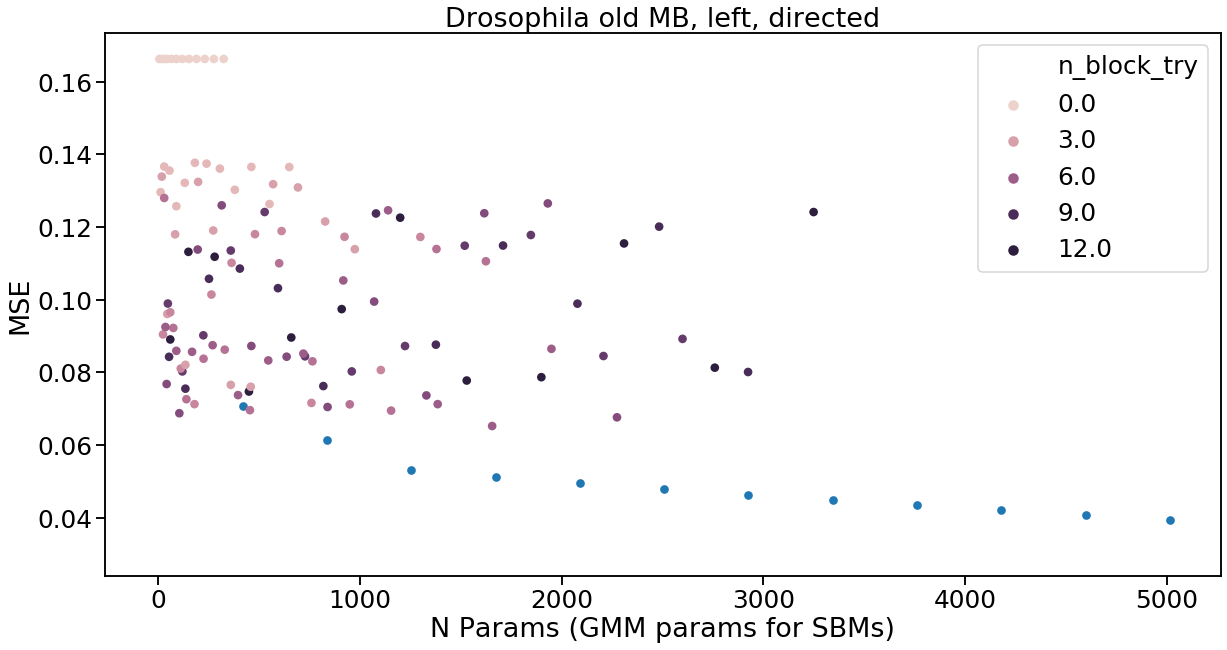

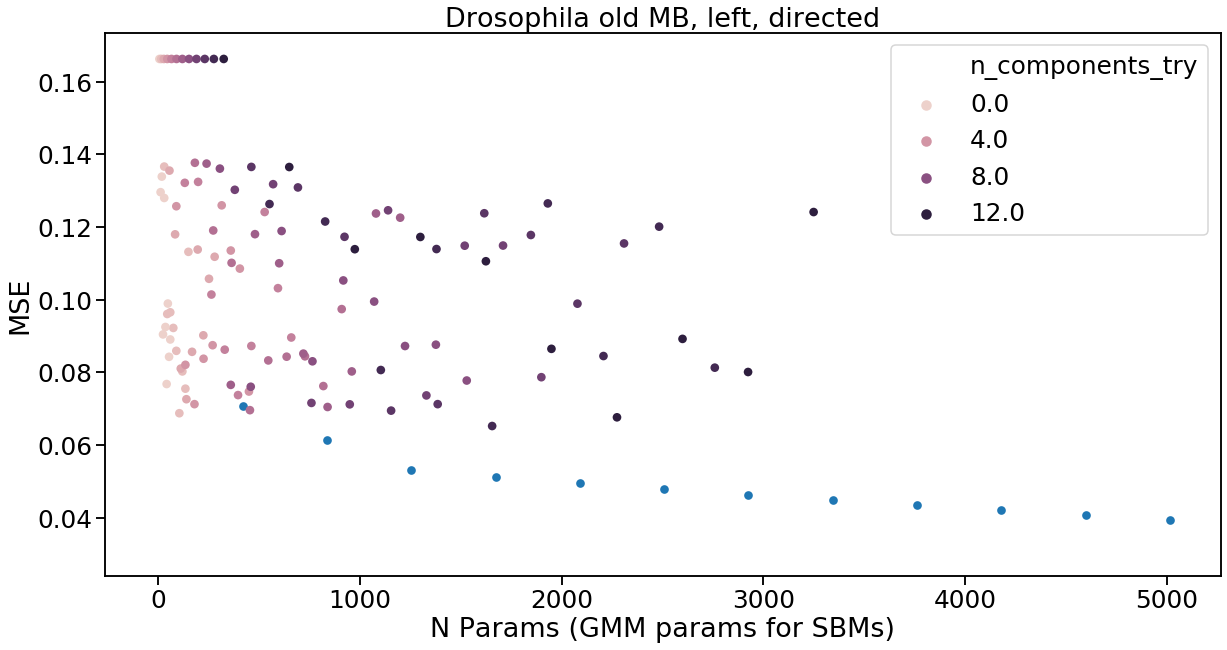

In [9]:
sns.set_context("talk", font_scale=1.5)
plt_kws = dict(s=75, linewidth=0, legend='brief')

plt.figure(figsize=(20,10))
sns.scatterplot(data=rdpg_df, x="n_params", y="mse", **plt_kws)
sns.scatterplot(data=sbm_df, x="n_params_gmm", y="mse", hue="n_block_try", **plt_kws)
plt.xlabel("N Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title("Drosophila old MB, left, directed");

plt.figure(figsize=(20,10))
sns.scatterplot(data=rdpg_df, x="n_params", y="mse", **plt_kws)
sns.scatterplot(data=sbm_df, x="n_params_gmm", y="mse", hue="n_components_try", **plt_kws)
plt.xlabel("N Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title("Drosophila old MB, left, directed");

# plt.figure(figsize=(20,10))
# sns.scatterplot(data=rdpg_df, x="n_params", y="mse", **plt_kws)
# sns.scatterplot(data=sbm_df, x="n_params_sbm", y="mse", hue="n_components_try", **plt_kws)
# plt.xlabel("N Params")
# plt.ylabel("MSE")
# plt.title("Drosophila old MB, left, directed")